# Assignment 6 Solutions

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy.special import gamma

def q_tukey(k, v, alpha):

    qarray = []
    for k in range(2,k+1):
        print ("q_tukey: calculating k = ",k)

        dq = 0.003
        qd = np.array(np.arange(0.000,6.000,dq))

        f = []
        fs = []
        found = False

        for i in range(len(qd)):
            q = qd[i]
            prefactor = np.sqrt(2.0*np.pi)*k*(k-1)*v**(v/2.0)/(gamma(v/2.0)*2**(v/2.0-1))
            npts = 100

            xh = 6.0
            xl = 0.0
            dx = (xh-xl)/npts

            x = np.arange(xl,xh,dx)
            x = x.reshape(1,-1)
    
            ul = -6.0
            uh = 6.0
            du = (uh-ul)/npts
            
            u = np.arange(ul,uh,du)
            u = u.reshape(-1,1)
            
            phi_u = stats.norm.pdf(u)
            phi_ux = stats.norm.pdf(u-q*x)
            Phi_u = stats.norm.cdf(u)
            Phi_ux = stats.norm.cdf(u-q*x)
            phi_x = stats.norm.pdf(np.sqrt(v)*x)
            
            integrand = x**v*phi_x*phi_u*phi_ux*(Phi_u-Phi_ux)**(k-2)*du*dx
            
            #print ("U integral matrix")
            #print(u,phi_u,phi_ux,Phi_u,Phi_ux,phi_x,x**v,integrand)
        
            sumux = integrand.sum()
            
            #print ("U sum")
            #print(sumux)
            
            #print ("X sum * prefactor")
            #print (sumux*prefactor)

            f.append(sumux*prefactor)
            
            if (i>0):
                fs.append(f[i]*dq+fs[i-1])
            else:
                fs.append(f[i]*dq)

            if (fs[i]>(1-alpha) and not(found)):
                q_critical = qd[i-1] + ((1-alpha)-fs[i-1])*(qd[i]-qd[i-1])/(fs[i]-fs[i-1])
                print ("q_critical = ",q_critical)
                found = True
        
            #print(q,f[i],fs[i])
            
        qarray.append(q_critical)
        plt.scatter(q_critical,(1-alpha))
    
        f = np.array(f)
        fs = np.array(fs)
        plt.plot(qd,fs)

    qarray=np.array(qarray)
    return qarray

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question 1

The number of miles of useful tread wear (in 1000s) was determined for tires of each of five different makes of subcompact car (factor A, with I = 5) in combination with each of four different brands of radial tires (factor B, with J = 4), resulting in IJ = 20 observations. The values SSA = 30.3, SSB = 44.4, and SSE = 59.3 were then computed. Assume that an additive model is appropriate.

(a) Test Ho: α1 = α2 = α3 = α4 = α5 = 0 (no differences in true average tire lifetime due to makes of cars) versus Ha: at least one αi ≠ 0 using a level .05 test. (Give answers accurate to 2 decimal places.)

(b) Ho: β1 = β2 = β3 = β4 = 0 (no differences in true average tire lifetime due to brands of tires) versus Ha: at least one βi ≠ 0 using a level .05 test. (Give answers accurate to 2 decimal places.)

In [ ]:
a = 5
b = 4
n = 1

N = n*a*b

vTotal = N-1
vA = a-1
vB = b-1
vError = vTotal - vA - vB

ssA = 30.8
ssB = 44.2
ssError = 59.1
ssTotal = ssA + ssB + ssError

msA = ssA / vA
msB = ssB / vB
msError = ssError / vError

fsnA = msA / msError
fsnB = msB / msError

print("F Signal/Noise A: %0.2f" % fsnA)

alpha = 0.05

fDistA = stats.f(vA, vError)
fHighA = fDistA.ppf(1-alpha)

print("Critical F-Value A: %0.2f" % fHighA)

if (fsnA > 1):
  pValueA = 1 - fDistA.cdf(fsnA)
else:
  pValueA = fdistA.cdf(fsnA)

print("P-Value A: %0.3f" % pValueA)



print("F Signal/Noise B: %0.2f" % fsnB)

alpha = 0.05

fDistB = stats.f(vB, vError)
fHighB = fDistB.ppf(1-alpha)

print("Critical F-Value B: %0.2f" % fHighB)

if (fsnB > 1):
  pValueB = 1 - fDistB.cdf(fsnB)
else:
  pValueB = fdistB.cdf(fsnB)

print("P-Value B: %0.3f" % pValueB)

print()
print("Source            df         SS        MS      f     Critical F");
print("A                 %0.0f          %0.2f     %0.2f     %0.2f   %0.2f" % (vA, ssA, msA, fsnA, fHighA))
print("B                 %0.0f          %0.2f     %0.2f     %0.2f   %0.2f" % (vB, ssB, msB, fsnB, fHighB))
print("Error             %0.0f          %0.2f     %0.2f" % (vError, ssError, msError))
print("Total             %0.0f          %0.2f" % (vTotal, ssTotal))

F Signal/Noise A: 1.56
Critical F-Value A: 3.26
P-Value A: 0.247
F Signal/Noise B: 2.99
Critical F-Value B: 3.49
P-Value B: 0.073

Source            df         SS        MS      f     Critical F
A                 4          30.80     7.70     1.56   3.26
B                 3          44.20     14.73     2.99   3.49
Error             12          59.10     4.92
Total             19          134.10


# Question 2

Four different coatings are being considered for corrosion protection of metal pipe. The pipe will be buried in three different types of soil. To investigate whether the amount of corrosion depends either on the coating or on the type of soil, 12 pieces of pipe are selected. Each piece is coated with one of the four coatings and buried in one of the three types of soil for a fixed time, after which the amount of corrosion (depth of maximum pits, in .0001 in.) is determined. The data appears in the table.

(a) Assuming the validity of the additive model, carry out the ANOVA analysis using an ANOVA table to see whether the amount of corrosion depends on either the type of coating used or the type of soil. Use α = .05. (Give answers accurate to 2 decimal places and the p-values to 3 decimal places.)

(b) Compute the model parameters. (Give answers to 2 decimal places.)

In [ ]:
xijk = np.array([[66,1,1],[51,1,2],[51,1,3],
                [54,2,1],[50,2,2],[49,2,3],
                [45,3,1],[44,3,2],[51,3,3],
                [52,4,1],[43,4,2],[51,4,3]])

df = pd.DataFrame(xijk, columns=['value', 'A', 'B'])

formula = "value ~ C(A) + C(B)"
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print(anovaResults)

           df      sum_sq    mean_sq         F    PR(>F)
C(A)      3.0  145.583333  48.527778  2.138311  0.196654
C(B)      2.0  105.166667  52.583333  2.317013  0.179622
Residual  6.0  136.166667  22.694444       NaN       NaN


### The model parameters are simply the differences between the group averages and the overall average ($\mu$)

In [ ]:
N = len(xijk)
vTotal = N-1

a = 4
b = 3

n = N/(a+b)

vA = a-1
vB = b-1
vAB = vA*vB

vError = vTotal - vA - vB - vAB

print("vA, vB, vAB, vError, vTotal: ", vA, vB, vAB, vError, vTotal)

xBarBar = df['value'].mean()
print()
print("Mu:", xBarBar)

vA, vB, vAB, vError, vTotal:  3 2 6 0 11

Mu: 50.583333333333336


In [ ]:
xA = df.groupby(['A'])[['value']].mean()
xABB = (xA['value']-xBarBar)

print("Alpha: ",xABB)

Alpha:  A
1    5.416667
2    0.416667
3   -3.916667
4   -1.916667
Name: value, dtype: float64


In [ ]:
xB = df.groupby(['B'])[['value']].mean()
xBBB = (xB['value']-xBarBar)

print("Beta: ",xBBB)

Beta:  B
1    3.666667
2   -3.583333
3   -0.083333
Name: value, dtype: float64


# Question 3

The article "Adiabatic Humidification of Air with Water in a Packed Tower" (Chem. Eng. Prog., 1952: 362-370) reports data on gas film heat transfer coefficient (Btu/hr ft2 on °F) as a function of gas rate (factor A) and liquid rate (factor B).

(a) After constructing an ANOVA table, test at level .01 both the hypothesis of no gas-rate effect against the appropriate alternative and the hypothesis of no liquid-rate effect against the appropriate alternative. (Give answers accurate to 1 decimal place.)

(b) Use Tukey's procedure to investigate differences in expected heat transfer coefficient due to different gas rates. (Give answers accurate to 2 decimal places.)

(c) Repeat part (b) for liquid rates. (Give answers accurate to 2 decimal places.)

In [ ]:
xijk = np.array([
                 [200,1,1],[226,1,2],[240,1,3],[261,1,4],
                 [278,2,1],[312,2,2],[330,2,3],[381,2,4],
                 [369,3,1],[416,3,2],[462,3,3],[517,3,4],
                 [500,4,1],[575,4,2],[645,4,3],[733,4,4]
])

df = pd.DataFrame(xijk, columns=['value','A','B'])

formula = "value ~ C(A) + C(B)"
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print(anovaResults)

a = 4
b = 4
n = 1

N = n*a*b

vTotal = N-1
vA = a-1
vB = b-1
vError = vTotal-vA-vB

alpha = 0.01

fDistA = stats.f(vA, vError)
fHighA = fDistA.ppf(1-alpha)

print("Critical F-Value A: %0.2f" % fHighA)

           df       sum_sq        mean_sq           F        PR(>F)
C(A)      3.0  324082.1875  108027.395833  105.311956  2.504972e-07
C(B)      3.0   39934.1875   13311.395833   12.976793  1.281863e-03
Residual  9.0    9232.0625    1025.784722         NaN           NaN
Critical F-Value A: 6.99


Standard Error: 16.014
Original xBar: [231.75 325.25 441.   613.25]
Sorted xBar: [231.75 325.25 441.   613.25]
q_tukey: calculating k =  2
q_critical =  4.524647757521833
q_tukey: calculating k =  3
q_critical =  5.426582159217026
q_tukey: calculating k =  4
q_critical =  5.955182266371887
[4.52464776 5.42658216 5.95518227]
W = 95.4
[231.75, 325.25, 441.0, 613.25]
i j xbar1 xbar2 Diff Diff_comp Result
1 2 231.8 325.2 5.839  4.525 Yes
1 3 231.8 441.0 13.067  5.427 Yes
1 4 231.8 613.2 23.823  5.955 Yes
2 3 325.2 441.0 7.228  4.525 Yes
2 4 325.2 613.2 17.984  5.427 Yes
3 4 441.0 613.2 10.756  4.525 Yes


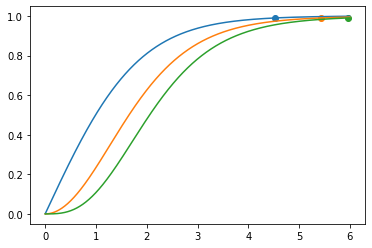

In [ ]:
xBar = df.groupby(['A'])[['value']].mean()
xBar = np.array(xBar)
xBar = xBar.flatten()

msError = 1025.784722
dofError = 9
alpha = 0.01
n = 4

stdError = np.sqrt(msError/n)
print("Standard Error: %0.3f" % stdError)

print("Original xBar:", xBar)
xBarOrig = xBar.copy()
xBar.sort()
print("Sorted xBar:", xBar)

nMeans = len(xBar)
q = q_tukey(nMeans, dofError, alpha)
print(q)

W = q[nMeans-2]*stdError

print ("W = %0.1f" % W)

print (list(xBarOrig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xBar)):
    for j in range(len(xBar)):
        if (xBar[j] > xBar[i]):
            diff = (xBar[j] - xBar[i])/stdError
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes"
            else:
                Result = "No"
            iorig = list(xBarOrig).index(xBar[i])+1
            jorig = list(xBarOrig).index(xBar[j])+1
            print ("%0.0f %0.0f %0.1f %0.1f %0.3f  %0.3f %s" % (iorig,jorig,xBar[i],xBar[j],diff,diff_comp,Result))

Standard Error: 16.006
Original xBar: [336.75 382.25 419.25 473.  ]
Sorted xBar: [336.75 382.25 419.25 473.  ]
q_tukey: calculating k =  2
q_critical =  4.524647757521833
q_tukey: calculating k =  3
q_critical =  5.426582159217026
q_tukey: calculating k =  4
q_critical =  5.955182266371887
[4.52464776 5.42658216 5.95518227]
W = 95.3
[336.75, 382.25, 419.25, 473.0]
i j xbar1 xbar2 Diff Diff_comp Result
1 2 336.8 382.2 2.843  4.525 No
1 3 336.8 419.2 5.154  5.427 No
1 4 336.8 473.0 8.512  5.955 Yes
2 3 382.2 419.2 2.312  4.525 No
2 4 382.2 473.0 5.670  5.427 Yes
3 4 419.2 473.0 3.358  4.525 No


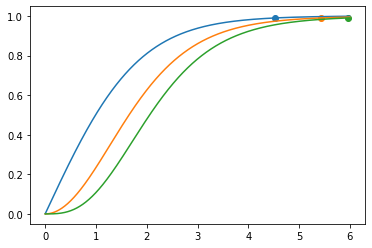

In [ ]:
xBar = df.groupby(['B'])[['value']].mean()
xBar = np.array(xBar)
xBar = xBar.flatten()

msError = 1024.784722
dofError = 9
alpha = 0.01
n = 4

stdError = np.sqrt(msError/n)
print("Standard Error: %0.3f" % stdError)

print("Original xBar:", xBar)
xBarOrig = xBar.copy()
xBar.sort()
print("Sorted xBar:", xBar)

nMeans = len(xBar)
q = q_tukey(nMeans, dofError, alpha)
print(q)

W = q[nMeans-2]*stdError

print ("W = %0.1f" % W)

print (list(xBarOrig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xBar)):
    for j in range(len(xBar)):
        if (xBar[j] > xBar[i]):
            diff = (xBar[j] - xBar[i])/stdError
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes"
            else:
                Result = "No"
            iorig = list(xBarOrig).index(xBar[i])+1
            jorig = list(xBarOrig).index(xBar[j])+1
            print ("%0.0f %0.0f %0.1f %0.1f %0.3f  %0.3f %s" % (iorig,jorig,xBar[i],xBar[j],diff,diff_comp,Result))

# Question 4

In an experiment to assess the effect of the angle of pull on the force required to cause separation in electrical connectors, four different angles (factor A) were used and each of a sample of five connectors (factor B) was pulled once at each angle. The data appears in the accompanying table.

Does the data suggest that true average separation force is affected by the angle of pull? State and test the appropriate hypotheses at level .01 by first constructing an ANOVA table (SST = 396.08, SSA = 56.12, SSB = 249.19). (Give answers accurate to 2 decimal places and the p-values to 3 decimal places.)

In [ ]:
xijk = np.array([
                 [45.1,1,1],[42.2,1,2],[39.5,1,3],[36.9,1,4],[46.0,1,5],
                 [44.0,2,1],[44.4,2,2],[38.5,2,3],[37.9,2,4],[47.4,2,5],
                 [42.5,3,1],[42.7,3,2],[42.7,3,3],[42.5,3,4],[48.9,3,5],
                 [43.7,4,1],[45.7,4,2],[48.0,4,3],[37.5,4,4],[56.4,4,5]
])
df = pd.DataFrame(xijk, columns=['value','A','B'])

formula = "value ~ C(A) + C(B)"
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print(anovaResults)

            df    sum_sq   mean_sq         F    PR(>F)
C(A)       3.0   56.2095  18.73650  2.389783  0.119753
C(B)       4.0  252.0650  63.01625  8.037531  0.002165
Residual  12.0   94.0830   7.84025       NaN       NaN


# Question 5

The article "The Effects of a Pneumatic Stool and a One-Legged Stool on Lower Limb Joint Load and Muscular Activity During Sitting and Rising" (Ergonomics, 1993: 519-535) gives the accompanying data on the effort required of a subject to arise from four different types of stools (Borg Scale).

Perform an analysis of variance using α = .05. (Give answers accurate to 2 decimal places.)



In [ ]:
xijk = np.array([
                 [12,1,1],[10,1,2],[7,1,3],[7,1,4],[8,1,5],[9,1,6],[8,1,7],[7,1,8],[9,1,9],
                 [15,2,1],[14,2,2],[14,2,3],[11,2,4],[11,2,5],[11,2,6],[12,2,7],[11,2,8],[13,2,9],
                 [12,3,1],[13,3,2],[13,3,3],[10,3,4],[8,3,5],[11,3,6],[12,3,7],[8,3,8],[10,3,9],
                 [10,4,1],[12,4,2],[9,4,3],[9,4,4],[7,4,5],[10,4,6],[11,4,7],[7,4,8],[8,4,9]
])
df = pd.DataFrame(xijk, columns=['value','A','B'])

formula = "value ~ C(A) + C(B)"
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print(anovaResults)

a = 4
b = 9
n = 1

N = n*a*b

vTotal = N-1
vA = a-1
vB = b-1
vError = vTotal-vA-vB

alpha = 0.05

fDistA = stats.f(vA,vError)
fHighA = fDistA.ppf(1-alpha)

print("Critical F-Value A: %0.2f" % fHighA)

            df     sum_sq    mean_sq          F        PR(>F)
C(A)       3.0  81.194444  27.064815  22.355641  3.934564e-07
C(B)       8.0  66.500000   8.312500   6.866157  1.060853e-04
Residual  24.0  29.055556   1.210648        NaN           NaN
Critical F-Value A: 3.01


Standard Error: 0.367
Original xBar: [ 8.55555556 12.44444444 10.77777778  9.22222222]
Sorted xBar: [ 8.55555556  9.22222222 10.77777778 12.44444444]
q_tukey: calculating k =  2
q_critical =  2.9058174025748973
q_tukey: calculating k =  3
q_critical =  3.5302035366602835
q_tukey: calculating k =  4
q_critical =  3.8997621338924193
[2.9058174  3.53020354 3.89976213]
W = 1.4
[8.555555555555555, 12.444444444444445, 10.777777777777779, 9.222222222222221]
i j xbar1 xbar2 Diff Diff_comp Result
1 4 8.6 9.2 1.818  2.906 No
1 3 8.6 10.8 6.059  3.530 Yes
1 2 8.6 12.4 10.603  3.900 Yes
4 3 9.2 10.8 4.241  2.906 Yes
4 2 9.2 12.4 8.786  3.530 Yes
3 2 10.8 12.4 4.544  2.906 Yes


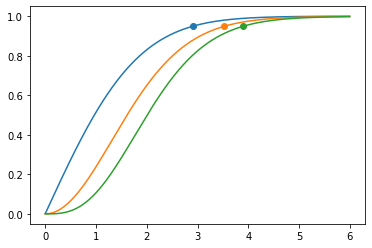

In [ ]:
xBar = df.groupby(['A'])[['value']].mean()
xBar = np.array(xBar)
xBar = xBar.flatten()

msError = 1.210648
dofError = vError
alpha = 0.05
n = 9

stdError = np.sqrt(msError/n)
print("Standard Error: %0.3f" % stdError)

print("Original xBar:", xBar)
xBarOrig = xBar.copy()
xBar.sort()
print("Sorted xBar:", xBar)

nMeans = len(xBar)
q = q_tukey(nMeans, dofError, alpha)
print(q)

W = q[nMeans-2]*stdError

print ("W = %0.1f" % W)

print (list(xBarOrig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xBar)):
    for j in range(len(xBar)):
        if (xBar[j] > xBar[i]):
            diff = (xBar[j] - xBar[i])/stdError
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes"
            else:
                Result = "No"
            iorig = list(xBarOrig).index(xBar[i])+1
            jorig = list(xBarOrig).index(xBar[j])+1
            print ("%0.0f %0.0f %0.1f %0.1f %0.3f  %0.3f %s" % (iorig,jorig,xBar[i],xBar[j],diff,diff_comp,Result))

# Question 6

In an experiment to assess the effects of curing time (factor A) and type of mix (factor B) on the compressive strength of hardened cement cubes, three different curing times were used in combination with four different mixes, with three observations obtained for each of the 12 curing time-mix combinations. The resulting sums of squares were computed to be SSA = 29,521.1, SSB = 35,170.8, SSE = 97,521.8, and SST = 205,578.5.

(a) Construct an ANOVA table. (Give df as exact integers, SS and MS to 1 decimal place, F to 2 decimal places, and p-values to 3 decimal places.)

(b) Test at level .05 the null hypothesis HoAB: all γij's = 0 (no interaction of factors) against HaAB: at least one γij ≠ 0.

(c) Test at level .05 the null hypothesis HoA: α1 = α2 = α3 = 0 (factor A main effects are absent) against HaA: at least one αi ≠ 0.

(d) Test HoB: β1 = β2 = β3 = β4 = 0 versus HaB: at least one βj ≠ 0 using a level .05 test.

(e) The values of the xi..'s were x1.. = 4010.88, x2.. = 4029.10, and x3.. = 3960.02. Use Tukey's procedure to investigate significant differences among the three curing times. (Give answer accurate to 2 decimal places.)


In [2]:
a = 3
b = 4
n = 3

N = n*a*b

vTotal = N-1
vA = a-1
vB = b-1
vAB = vA*vB
vTreatment = vA+vB+vAB
vError = vTotal-vTreatment

print("vA, vB, vAB, vError, vTotal:", vA, vB, vAB, vError, vTotal)

vA, vB, vAB, vError, vTotal: 2 3 6 24 35


In [3]:
ssA = 29189.0
ssB = 34339.2
ssError = 95899.1
ssTotal = 204385.1

ssAB = ssTotal - ssA - ssB - ssError
print("ssAB = %0.1f" % ssAB)

ssAB = 44957.8


In [4]:
msA = ssA/vA
msB = ssB/vB
msAB = ssAB/vAB
msError = ssError/vError

fsnA = msA/msError
fsnB = msB/msError
fsnAB = msAB/msError

print("F Signal/Nouse A: %0.2f" % fsnA)

alpha = 0.01

fDistA = stats.f(vA, vError)
fHighA = fDistA.ppf(1-alpha)

print("Critical F-Value A: %0.2f" % fHighA)

if (fsnA > 1):
  pValueA = 1-fDistA.cdf(fsnA)
else:
  pValueA = fDistA.cdf(fsnA)

print("P-Value A: % 0.3f" % pValueA)

print("F Signal/Nouse B: %0.2f" % fsnB)

fDistB = stats.f(vB, vError)
fHighB = fDistB.ppf(1-alpha)

print("Critical F-Value B: %0.2f" % fHighB)

if (fsnB > 1):
  pValueB = 1-fDistB.cdf(fsnB)
else:
  pValueB = fDistB.cdf(fsnB)

print("P-Value B: % 0.3f" % pValueB)

print("F Signal/Nouse AB: %0.2f" % fsnAB)

fDistAB = stats.f(vAB, vError)
fHighAB = fDistAB.ppf(1-alpha)

print("Critical F-Value AB: %0.2f" % fHighAB)

if (fsnAB > 1):
  pValueAB = 1-fDistAB.cdf(fsnAB)
else:
  pValueAB = fDistAB.cdf(fsnAB)

print("P-Value AB: % 0.3f" % pValueAB)

print()

print("Source     df      Sum of Squares    Mean Square     f     P-Value")
print("A          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vA, ssA, msA, fsnA, pValueA))
print("B          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vB, ssB, msB, fsnB, pValueB))
print("AB          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vAB, ssAB, msAB, fsnAB, pValueAB))
print("Error        %0.0f         %0.2f           %0.2f" % (vError, ssError, msError))
print("Total        %0.0f         %0.2f" % (vTotal, ssTotal))

F Signal/Nouse A: 3.65
Critical F-Value A: 5.61
P-Value A:  0.041
F Signal/Nouse B: 2.86
Critical F-Value B: 4.72
P-Value B:  0.058
F Signal/Nouse AB: 1.88
Critical F-Value AB: 3.67
P-Value AB:  0.127

Source     df      Sum of Squares    Mean Square     f     P-Value
A          2         29189.00           14594.50       3.65     0.041
B          3         34339.20           11446.40       2.86     0.058
AB          6         44957.80           7492.97       1.88     0.127
Error        24         95899.10           3995.80
Total        35         204385.10


Standard Error: 18.248
Original xBar: [4010.88 4029.1  3960.02]
Sorted xBar: [3960.02 4010.88 4029.1 ]
q_tukey: calculating k =  2
q_critical =  2.9058174025748973
q_tukey: calculating k =  3
q_critical =  3.5302035366602835
[2.9058174  3.53020354]
W = 64.4
[4010.88, 4029.1, 3960.02]
i j xbar1 xbar2 Diff Diff_comp Result
3 1 3960.0 4010.9 2.787  2.906 No
3 2 3960.0 4029.1 3.786  3.530 Yes
1 2 4010.9 4029.1 0.998  2.906 No


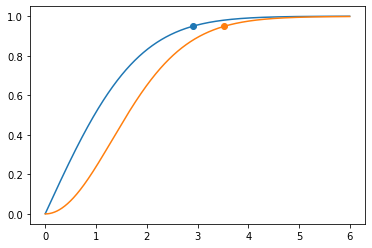

In [5]:
xBar = np.array([4010.88,4029.10,3960.02])

dofError = vError
alpha = 0.05
n = N/len(xBar)

stdError = np.sqrt(msError/n)
print("Standard Error: %0.3f" % stdError)

print("Original xBar:", xBar)
xBarOrig = xBar.copy()
xBar.sort()
print("Sorted xBar:", xBar)

nMeans = len(xBar)
q = q_tukey(nMeans, dofError, alpha)
print(q)

W = q[nMeans-2]*stdError

print ("W = %0.1f" % W)

print (list(xBarOrig))

print ("i j xbar1 xbar2 Diff Diff_comp Result")
for i in range(len(xBar)):
    for j in range(len(xBar)):
        if (xBar[j] > xBar[i]):
            diff = (xBar[j] - xBar[i])/stdError
            diff_comp = q[j-i-1]
            if (diff>diff_comp):
                Result = "Yes"
            else:
                Result = "No"
            iorig = list(xBarOrig).index(xBar[i])+1
            jorig = list(xBarOrig).index(xBar[j])+1
            print ("%0.0f %0.0f %0.1f %0.1f %0.3f  %0.3f %s" % (iorig,jorig,xBar[i],xBar[j],diff,diff_comp,Result))

# Question 7

To see whether thrust force in drilling is affected by drilling speed (A), feed rate (B), or material used (C), an experiment using four speeds, three rates, and two materials was performed, with two samples (L = 2) drilled at each combination of levels of the three factors. Sums of squares were calculated as follows: SSA = 19,122.02, SSB = 2,589,419.28, SSC = 158,083.12, SSAB = 52,465.89, SSAC = 9,046.12, SSBC = 92,061.74, and SSE = 57,721.17, and SST = 3,011,312.03. Construct the ANOVA table and identify significant interactions using α = 0.01. (Give SS and MS accurate to 1 decimal place, F values to 2 decimal places, and Df as exact integers.)

In [ ]:
a = 4
b = 3
c = 2
n = 2

N = n*a*b*c

vTotal = N-1
vA = a-1
vB = b-1
vC = c-1
vAB = vA*vB
vAC = vA*vC
vBC = vB*vC
vABC = vA*vB*vC

vTreatment = vA+vB+vC+vAB+vAC+vBC+vABC
vError = vTotal-vTreatment

print("vA, vB, vC, vAB, vAC, vBC, vABC:", vA, vB, vC, vAB, vAC, vBC, vABC)

vA, vB, vC, vAB, vAC, vBC, vABC: 3 2 1 6 3 2 6


In [ ]:
ssA = 19187.69
ssB = 2589572.13
ssC = 158040.52
ssAB = 52447.50
ssAC = 9051.63
ssBC = 92901.59
ssError = 57778.68
ssTotal = 3013106.87

ssABC = ssTotal - ssA - ssB - ssC - ssAB - ssAC - ssBC - ssError
print("ssABC: %0.2f" % ssABC)

ssABC: 34127.13


In [ ]:
msA = ssA/vA
msB = ssB/vB
msC = ssC/vC
msAB = ssAB/vAB
msAC = ssAC/vAC
msBC = ssBC/vBC
msABC = ssABC/vABC
msError = ssError/vError

fsnA = msA/msError
fsnB = msB/msError
fsnC = msC/msError
fsnAB = msAB/msError
fsnAC = msAC/msError
fsnBC = msBC/msError
fsnABC = msABC/msError

print("F Signal/Nouse A: %0.2f" % fsnA)

alpha = 0.05

fDistA = stats.f(vA, vError)
fHighA = fDistA.ppf(1-alpha)

print("Critical F-Value A: %0.2f" % fHighA)

if (fsnA > 1):
  pValueA = 1-fDistA.cdf(fsnA)
else:
  pValueA = fDistA.cdf(fsnA)

print("P-Value A: % 0.3f" % pValueA)

print("F Signal/Nouse B: %0.2f" % fsnB)

fDistB = stats.f(vB, vError)
fHighB = fDistB.ppf(1-alpha)

print("Critical F-Value B: %0.2f" % fHighB)

if (fsnB > 1):
  pValueB = 1-fDistB.cdf(fsnB)
else:
  pValueB = fDistB.cdf(fsnB)

print("P-Value B: % 0.3f" % pValueB)

print("F Signal/Nouse C: %0.2f" % fsnC)

fDistC = stats.f(vC, vError)
fHighC = fDistC.ppf(1-alpha)

print("Critical F-Value C: %0.2f" % fHighC)

if (fsnC > 1):
  pValueC = 1-fDistC.cdf(fsnC)
else:
  pValueC = fDistC.cdf(fsnC)

print("P-Value C: % 0.3f" % pValueC)

print("F Signal/Nouse AB: %0.2f" % fsnAB)

fDistAB = stats.f(vAB, vError)
fHighAB = fDistAB.ppf(1-alpha)

print("Critical F-Value AB: %0.2f" % fHighAB)

if (fsnAB > 1):
  pValueAB = 1-fDistAB.cdf(fsnAB)
else:
  pValueAB = fDistAB.cdf(fsnAB)

print("P-Value AB: % 0.3f" % pValueAB)

print("F Signal/Nouse AC: %0.2f" % fsnAC)

fDistAC = stats.f(vAC, vError)
fHighAC = fDistAC.ppf(1-alpha)

print("Critical F-Value AC: %0.2f" % fHighAC)

if (fsnAC > 1):
  pValueAC = 1-fDistAC.cdf(fsnAC)
else:
  pValueAC = fDistAC.cdf(fsnAC)

print("P-Value AC: % 0.3f" % pValueAC)

print("F Signal/Nouse BC: %0.2f" % fsnBC)

fDistBC = stats.f(vBC, vError)
fHighBC = fDistBC.ppf(1-alpha)

print("Critical F-Value BC: %0.2f" % fHighBC)

if (fsnBC > 1):
  pValueBC = 1-fDistBC.cdf(fsnBC)
else:
  pValueBC = fDistBC.cdf(fsnBC)

print("P-Value BC: % 0.3f" % pValueBC)

print("F Signal/Nouse ABC: %0.2f" % fsnABC)

fDistABC = stats.f(vABC, vError)
fHighABC = fDistABC.ppf(1-alpha)

print("Critical F-Value ABC: %0.2f" % fHighABC)

if (fsnABC > 1):
  pValueABC = 1-fDistABC.cdf(fsnABC)
else:
  pValueABC = fDistABC.cdf(fsnABC)

print("P-Value ABC: % 0.3f" % pValueABC)


print()

print("Source     df      Sum of Squares    Mean Square     f     P-Value")
print("A          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vA, ssA, msA, fsnA, pValueA))
print("B          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vB, ssB, msB, fsnB, pValueB))
print("C          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vC, ssC, msC, fsnC, pValueC))
print("AB          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vAB, ssAB, msAB, fsnAB, pValueAB))
print("AC          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vAC, ssAC, msAC, fsnAC, pValueAC))
print("BC          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vBC, ssBC, msBC, fsnBC, pValueBC))
print("ABC          %0.0f         %0.2f           %0.2f       %0.2f     %0.3f" % (vABC, ssABC, msABC, fsnABC, pValueABC))
print("Error        %0.0f         %0.2f           %0.2f" % (vError, ssError, msError))
print("Total        %0.0f         %0.2f" % (vTotal, ssTotal))

F Signal/Nouse A: 1.00
Critical F-Value A: 3.26
P-Value A:  0.553
F Signal/Nouse B: 179.28
Critical F-Value B: 3.49
P-Value B:  0.000
F Signal/Nouse C: 32.82
Critical F-Value C: 4.75
P-Value C:  0.000
F Signal/Nouse AB: 1.82
Critical F-Value AB: 3.00
P-Value AB:  0.179
F Signal/Nouse AC: 0.63
Critical F-Value AC: 3.49
P-Value AC:  0.389
F Signal/Nouse BC: 9.65
Critical F-Value BC: 3.89
P-Value BC:  0.003
F Signal/Nouse ABC: 1.18
Critical F-Value ABC: 3.00
P-Value ABC:  0.378

Source     df      Sum of Squares    Mean Square     f     P-Value
A          4         19187.69           4796.92       1.00     0.553
B          3         2589572.13           863190.71       179.28     0.000
C          1         158040.52           158040.52       32.82     0.000
AB          6         52447.50           8741.25       1.82     0.179
AC          3         9051.63           3017.21       0.63     0.389
BC          2         92901.59           46450.79       9.65     0.003
ABC          6         34

# Question 8

In an automated chemical coating process, the speed with which objects on a conveyor belt are passed through a chemical spray (belt speed), the amount of chemical sprayed (spray volume), and the brand of chemical used (brand) are factors that may affect the uniformity of the coating applied. A replicated $2^3$ experiment was conducted in an effort to increase the coating uniformity. In the following table, higher values of the response variable are associated with higher surface uniformity.

Analyze this data and state your conclusions. Let A = spray volume, B = belt speed, C = brand. (Use α = 0.05. Give answers accurate to 2 decimal places and Df as exact integers.)

In [ ]:
xijk = np.array([
                 [40,1,1,1],[36,1,1,1],[25,2,1,1],[28,2,1,1],
                 [30,1,2,1],[32,1,2,1],[50,2,2,1],[48,2,2,1],
                 [45,1,1,2],[43,1,1,2],[25,2,1,2],[30,2,1,2],
                 [30,1,2,2],[29,1,2,2],[52,2,2,2],[49,2,2,2]
])

df = pd.DataFrame(xijk,columns=['value','SV','BS','B'])

formula = 'value ~ C(SV) + C(BS) + C(B) + C(SV):C(BS) + C(SV):C(B) + C(BS):C(B) + C(SV):C(BS):C(B)'
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print(anovaResults)

                   df   sum_sq  mean_sq           F        PR(>F)
C(SV)             1.0    30.25    30.25    6.722222  3.197737e-02
C(BS)             1.0   144.00   144.00   32.000000  4.776141e-04
C(B)              1.0    12.25    12.25    2.722222  1.375685e-01
C(SV):C(BS)       1.0  1122.25  1122.25  249.388889  2.584228e-07
C(SV):C(B)        1.0     1.00     1.00    0.222222  6.499402e-01
C(BS):C(B)        1.0    12.25    12.25    2.722222  1.375685e-01
C(SV):C(BS):C(B)  1.0    16.00    16.00    3.555556  9.607159e-02
Residual          8.0    36.00     4.50         NaN           NaN


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.special import gamma

def fpcalc(MS_treatment,MS_error,dof_treatment,dof_error,alpha):
    
    fSN = float(MS_treatment/MS_error)
    print ("F Signal/Noise = %0.2f " % fSN)

    fdist = stats.f(dof_treatment,dof_error)
    fhigh = fdist.ppf(1-alpha)
    print ("Critical F-value = %0.2f" % (fhigh))

    if (fSN > 1):
        pvalue = (1-fdist.cdf(fSN))
    else:
        pvalue = fdist.cdf(fSN)
        
    print ("Pvalue = %0.3f" % (pvalue))

    return (fSN,pvalue)



In [9]:
fpcalc(2970.40/16,468.71/32,16,32,0.05)

F Signal/Noise = 12.67 
Critical F-value = 1.97
Pvalue = 0.000


(12.674788248597215, 1.3309039426090408e-09)